In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [2]:
df=pd.read_csv('movies.csv')

In [3]:
df.corr()

,Audience score %,Profitability,Rotten Tomatoes %,Year
Audience score %,1.000000,0.066278,0.608333,-0.229926
Profitability,0.066278,1.000000,0.042428,-0.182130
Rotten Tomatoes %,0.608333,0.042428,1.000000,-0.093111
Year,-0.229926,-0.182130,-0.093111,1.000000


In [4]:
dt= pd.DataFrame(index=range(0,len(df)), columns=['Audience score %','Rotten Tomatoes %'])
for i in range(0,len(dt)):
  dt['Audience score %'][i]= df['Audience score %'][i]
  dt['Rotten Tomatoes %'][i]= df['Rotten Tomatoes %'] [i]

In [5]:
dt

,Audience score %,Rotten Tomatoes %
0,70,64
1,52,68
2,35,43
3,44,15
4,72,28
...,...,...
72,84,54
73,64,89
74,89,79
75,71,40


In [6]:
x = dt['Audience score %']
y= dt['Rotten Tomatoes %']
x=np.array(x)
x=x.reshape(-1,1)
y=np.array(y)
y=y.reshape(-1,1)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [8]:
pred = model.predict(x_test)
pred

array([[58.70663406],
       [51.26782559],
       [27.71159877],
       [56.22703123],
       [63.6658397 ],
       [45.06881853],
       [27.71159877],
       [30.1912016 ],
       [46.30861994],
       [56.22703123],
       [32.67080442],
       [79.78325805],
       [20.27279031],
       [71.10464817],
       [47.54842135],
       [30.1912016 ]])

In [15]:
rms=np.sqrt(np.mean(np.power((y_test-pred),2)))
rms

17.617876901027792

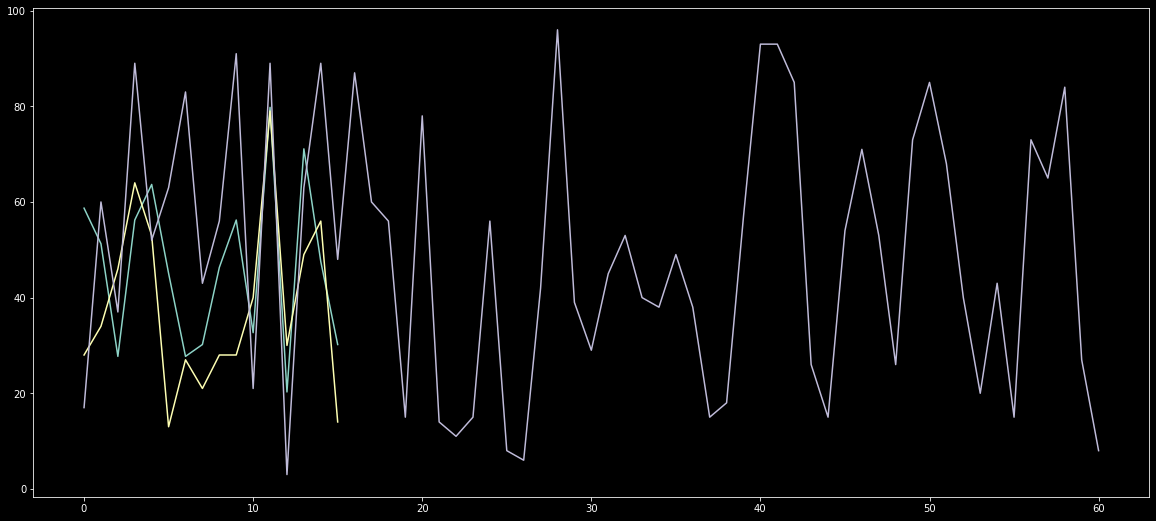

In [16]:
plt.figure(figsize=(20,9))
plt.plot(pred)
plt.plot(y_test)
plt.plot(y_train)